In [1]:
#these are utility functions for Udemy-course: Python for Finance: Investment Fundamentals & Data Analytics
#we use alpha_vantage to retrieve data as csv and store them locally for re-use
#~in anaconda 3 python3.7 all modules are store in ~/opt/anaconda3/lib/python3.7/site-packages
import numpy as np
import pandas as pd
#from alpha_vantage.timeseries import TimeSeries
from pprint import pprint

In [2]:
import myalpha
api_key_alpha = myalpha.secret['api_key_alpha']

print(api_key_alpha)

77K8XPSR3XWWZJ80


# import new ticker if not in data folder yet

In [10]:
#import csv data from alpha_vantage from scratch (everything since year 2000) and store it in data folder
#create a data folder
#example: import csv data for Procter&Gamble and SPY (etf which mimicks S&P 500 index)
#you alway need to import and store a symbol once you can work with its csv.
#if you don't the ticker symbol use alpha vantage for google sheets functionality (extension)
#after importing extension and registered you api_key use formula =AVSearchEquitySymbol("<some symbol_description")
#example: =AVSearchEquitySymbol("bayer") this will output for example the ticker-symbol: BAYN.DEX
import myalpha_util as myau
import myalpha 
import os
api_key_alpha = myalpha.secret['api_key_alpha']
function='TIME_SERIES_DAILY_ADJUSTED'
symbol_list=['WMT']

myau.get_alphav_10symbols(symbol_list,api_key_alpha,function)

_____________________________
WMT 1
Directory  ./data/WMT  Created 
Last Modified Time :  2020-05-31 17:32:35


# show ticker in data folder

In [11]:
import myalpha_util as myau
symbol_list=['WMT']
startd='2015-01-01'
endd='2020-01-01'
for symbol in symbol_list:
    df = myau.get_daily_symbol(symbol,startd,endd)
    print("symbol: " + symbol)
    df.head()
    df.index

symbol: WMT


,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
timestamp,,,,,,,,
2015-01-02,86.27,86.720,85.545,85.90,75.1399,4501803,0.0,1.0
2015-01-05,85.72,86.320,85.510,85.65,74.9212,6978986,0.0,1.0
2015-01-06,85.98,86.750,85.790,86.31,75.4986,8202585,0.0,1.0
2015-01-07,86.78,88.680,86.670,88.60,77.5017,8498008,0.0,1.0
2015-01-08,89.21,90.665,89.070,90.47,79.1375,12703627,0.0,1.0


DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='timestamp', length=1258, freq=None)

In [12]:
#if your csv is out-dated (less than 100days)then you can update it by using update_csv
#this will retrieve the last 100days of you symbols from alpha_vantage and append the ones missing in 
#your csv - it will write back the csv file with the appended registries 
import myalpha_util as myau
symbol_list=['WMT']
myau.update_csv(symbol_list,api_key_alpha)


processing symbol: WMT
last stock-date available from alpha_vantage: 2020-05-29
number of entries we need to append to csv: 0
retrieving head data from csv
nothing to append


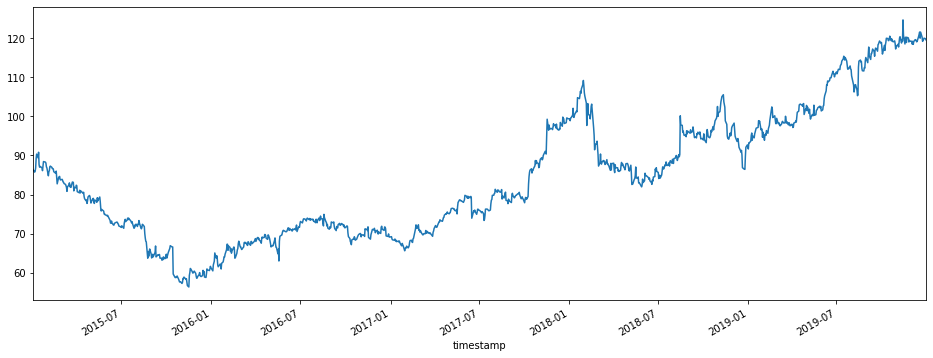

In [13]:
df['open'].plot(figsize=(16,6))

In [18]:
df.shift(periods=-1).head()

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,close_30d_MA,close_90d_MA
timestamp,,,,,,,,,,
2015-01-02,85.72,86.320,85.51,85.65,74.9212,6978986.0,0.0,1.0,NaN,NaN
2015-01-05,85.98,86.750,85.79,86.31,75.4986,8202585.0,0.0,1.0,NaN,NaN
2015-01-06,86.78,88.680,86.67,88.60,77.5017,8498008.0,0.0,1.0,NaN,NaN
2015-01-07,89.21,90.665,89.07,90.47,79.1375,12703627.0,0.0,1.0,NaN,NaN
2015-01-08,90.32,90.390,89.25,89.35,78.1578,8468842.0,0.0,1.0,NaN,NaN


In [20]:
df.tshift(periods=1,freq='M').head()

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,close_30d_MA,close_90d_MA
timestamp,,,,,,,,,,
2015-01-31,86.27,86.720,85.545,85.90,75.1399,4501803,0.0,1.0,NaN,NaN
2015-01-31,85.72,86.320,85.510,85.65,74.9212,6978986,0.0,1.0,NaN,NaN
2015-01-31,85.98,86.750,85.790,86.31,75.4986,8202585,0.0,1.0,NaN,NaN
2015-01-31,86.78,88.680,86.670,88.60,77.5017,8498008,0.0,1.0,NaN,NaN
2015-01-31,89.21,90.665,89.070,90.47,79.1375,12703627,0.0,1.0,NaN,NaN


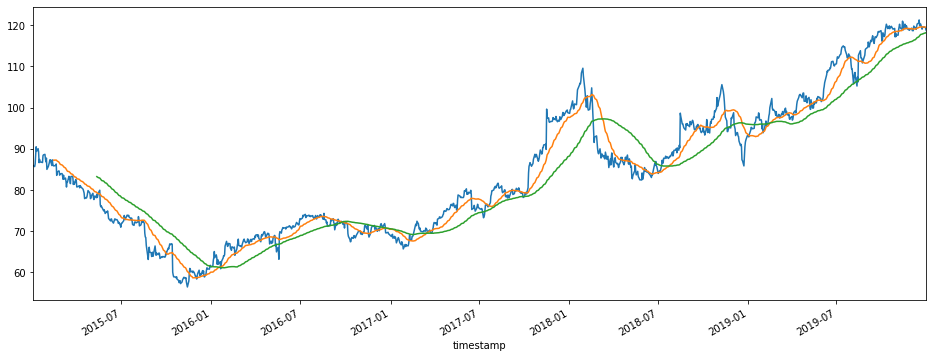

In [21]:
df['close'].plot()
df.rolling(window=30).mean()['close'].plot(figsize=(16,6))
df.rolling(window=90).mean()['close'].plot(figsize=(16,6))

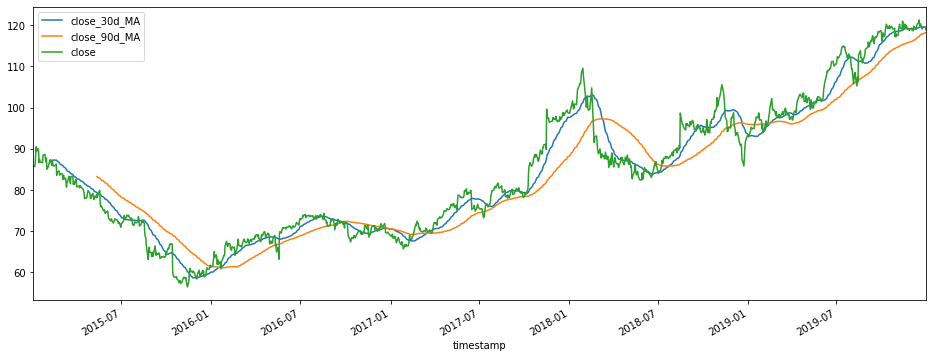

In [22]:
df['close_30d_MA']=df['close'].rolling(window=30).mean()
df['close_90d_MA']=df['close'].rolling(window=90).mean()
df[['close_30d_MA','close_90d_MA','close']].plot(figsize=(16,6))

In [23]:
df[['close_30d_MA','close_90d_MA','close']]

,close_30d_MA,close_90d_MA,close
timestamp,,,
2015-01-02,NaN,NaN,85.90
2015-01-05,NaN,NaN,85.65
2015-01-06,NaN,NaN,86.31
2015-01-07,NaN,NaN,88.60
2015-01-08,NaN,NaN,90.47
...,...,...,...
2019-12-24,119.576333,117.889222,119.51
2019-12-26,119.589667,117.952667,119.52
2019-12-27,119.543333,118.036444,119.59


## bollinger bands
* volatility bands places above and below a moving average
* volatility=standard-deviation
* are used for signalling tops and bottoms or to signal the actual strength of a trend

,close,close_20d_mean,Upper,Lower
timestamp,,,,
2019-06-03,101.96,101.3635,103.269902,99.457098
2019-06-04,102.56,101.3685,103.287494,99.449506
2019-06-05,104.42,101.5245,103.878099,99.170901
2019-06-06,105.11,101.7650,104.537493,98.992507
2019-06-07,106.06,102.0910,105.265994,98.916006
...,...,...,...,...
2019-12-24,119.51,119.5130,120.937435,118.088565
2019-12-26,119.52,119.5295,120.945803,118.113197
2019-12-27,119.59,119.5710,120.940224,118.201776


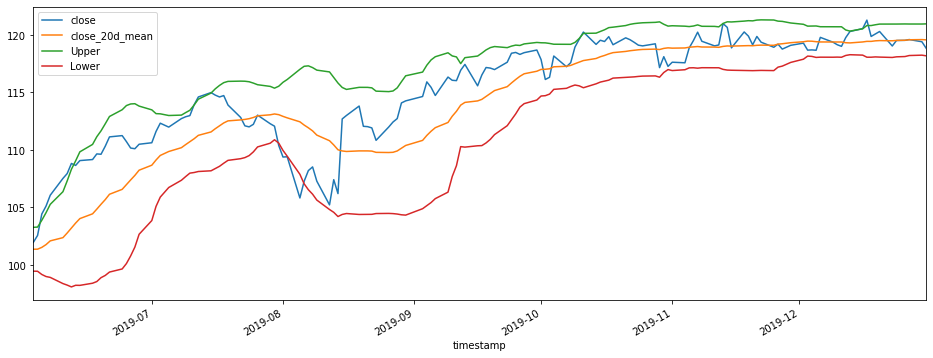

In [25]:

#close 20 mA
df['close_20d_mean']=df['close'].rolling(20).mean()

#Upper = 20MA + 2*std(20)
df['Upper']=df['close_20d_mean'] + 2*(df['close'].rolling(20).std())

#Lower= 20MA - 2*std(20)
df['Lower']=df['close_20d_mean'] - 2*(df['close'].rolling(20).std())

#df[['close','close_20d_mean','Upper','Lower']].tail(200).plot(figsize=(16,6))
df[['close','close_20d_mean','Upper','Lower']].loc['2019-06-01':]
df[['close','close_20d_mean','Upper','Lower']].loc['2019-06-01':].plot(figsize=(16,6))

